# EMD algorithm - Experiments with longitudinal acceleration in one trip

## Maria Inês Silva
## 01/02/2019

***

## Data and library imports

In [1]:
import numpy as np
import pandas as pd
import time
import pickle
import extendedMD.emd as emd
from extendedMD.viz import create_motif_table, plot_k_motifs
from extendedMD.pruning import prune_motifs_with_mdl

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import dtw_clustering as clust

In [2]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-uah'))
output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))
exp = 1

In [3]:
trip_df = pd.read_pickle(os.path.join(data_folder, 'trip_df.pkl'))
ts = trip_df['az'].values
events_ts = trip_df['event_type'].values

## Experiment 1

In [4]:
R = 0.1
win_size = 15
paa_size = 3
alphabet_size = 5
adaptive_break_points = True

motif_file_name = 'motif_lon_acc_trip_exp' + str(exp) + '.p'
dist_file_name = 'dist_lon_acc_trip_exp' + str(exp) + '.npy'
exp += 1

In [5]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

motif_df = create_motif_table(motif_dic_list)
motif_df.sort_values('mdl_cost').head(10)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
ExtendedMD algorithm run in 9.54 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
25,[ccc],1,148,43014.65,0.06
0,[dcb],1,133,45949.42,0.06
15,[dda],1,98,49001.20,0.06
24,[ebb],1,92,49111.76,0.06
20,[bdc],1,96,49126.73,0.06
42,[cdb],1,103,50109.12,0.06
28,[dbc],1,99,50369.80,0.06
45,[add],1,82,50454.97,0.06
39,[eca],1,80,51161.61,0.06
3,[bcd],1,92,51737.66,0.06


In [6]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.17 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[ccc],1,148,43014.65,0.06
1,"[abe, ace, ade]",3,11,74458.86,0.07
2,"[eda, eca, eba]",3,9,75588.09,0.06
3,"[ccc, ddb, dda]",3,4,83877.63,0.05
4,"[eca, ebb, eac]",3,3,85245.75,0.05
5,"[eda, eca, eba, ebb, dbc, cbd, bbe, abe, ace]",9,3,89996.92,0.05


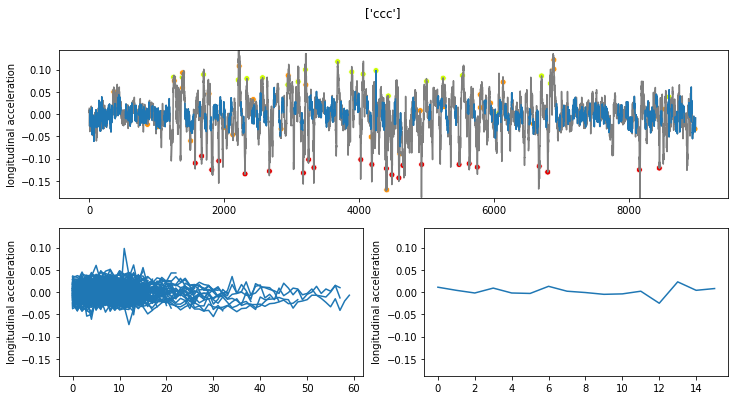

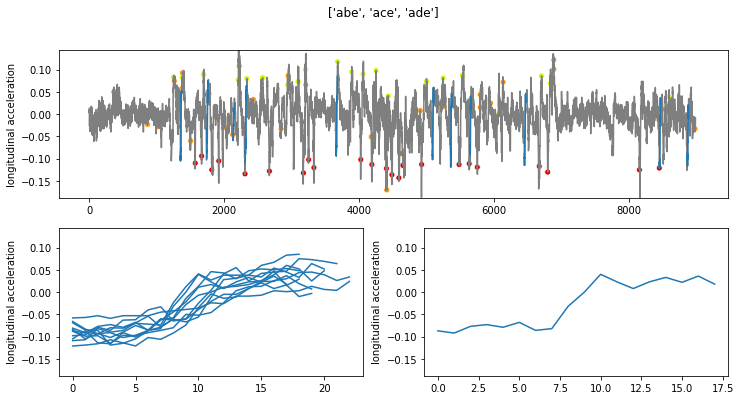

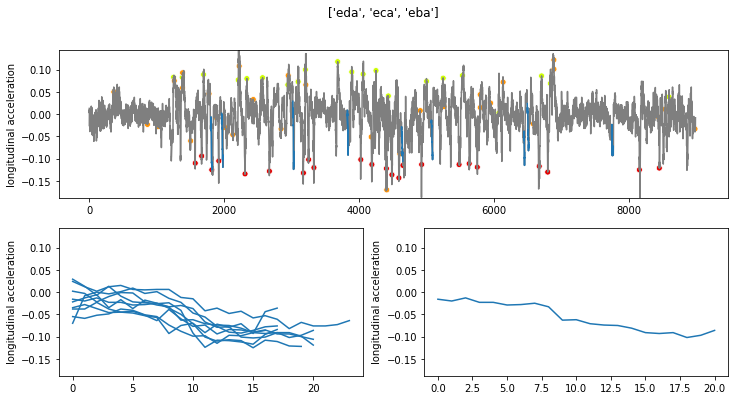

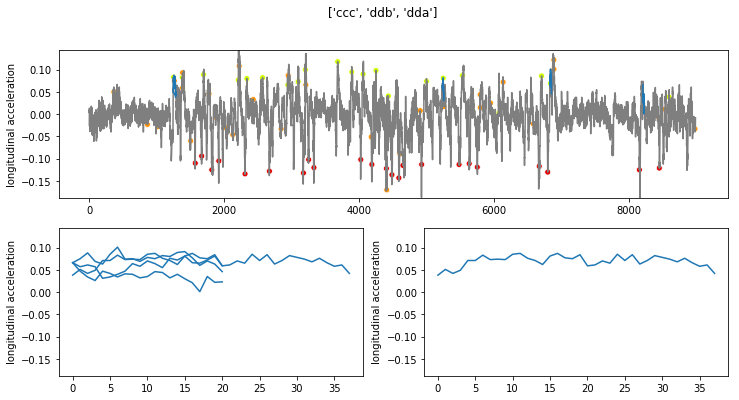

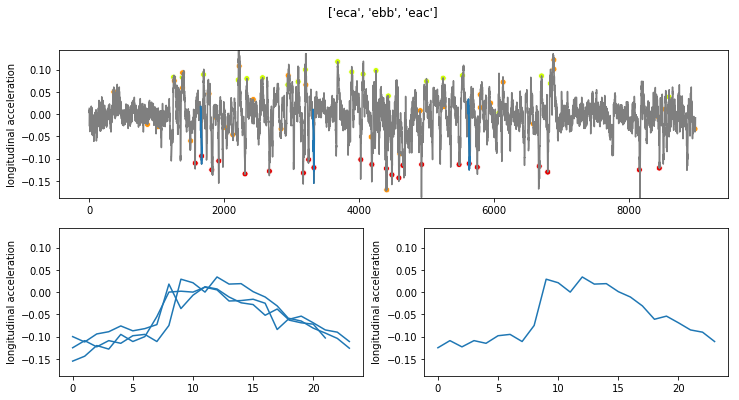

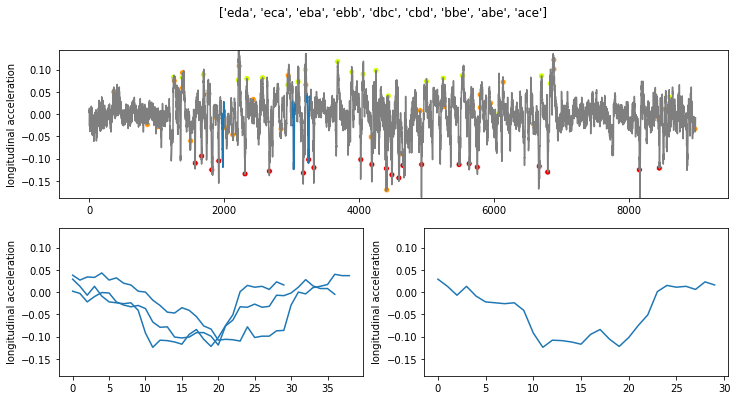

In [7]:
plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list, 'longitudinal acceleration')

In [8]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 18.8 minutes


In [9]:
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

## Experiment 2

In [10]:
R = 0.1
win_size = 20
paa_size = 4
alphabet_size = 5
adaptive_break_points = True

motif_file_name = 'motif_lon_acc_trip_exp' + str(exp) + '.p'
dist_file_name = 'dist_lon_acc_trip_exp' + str(exp) + '.npy'
exp += 1

In [11]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

motif_df = create_motif_table(motif_dic_list)
motif_df.sort_values('mdl_cost').head(10)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
ExtendedMD algorithm run in 8.51 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
15,[cccc],1,94,51452.07,0.06
75,[ecbb],1,70,56136.55,0.06
176,[ddca],1,67,56660.99,0.06
73,[ddbb],1,65,57992.39,0.06
6,[acdd],1,56,58526.45,0.07
40,[edba],1,52,59066.81,0.07
160,[bbce],1,58,59808.06,0.06
70,[dccb],1,60,60137.96,0.07
19,[abde],1,51,60441.04,0.06
154,[dcbc],1,48,62129.56,0.06


In [12]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.27 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[cccc],1,94,51452.07,0.06
1,"[cace, bade]",2,7,83104.09,0.07
2,"[edca, edba, edaa]",3,7,83521.65,0.06
3,"[acde, acdd, addd]",3,7,84752.58,0.07
4,"[bddb, cdda]",2,4,88111.15,0.05
5,"[edba, ecbb, ecab]",3,3,91947.59,0.04
6,"[bade, abde, acde, acdd]",4,2,94519.79,0.05


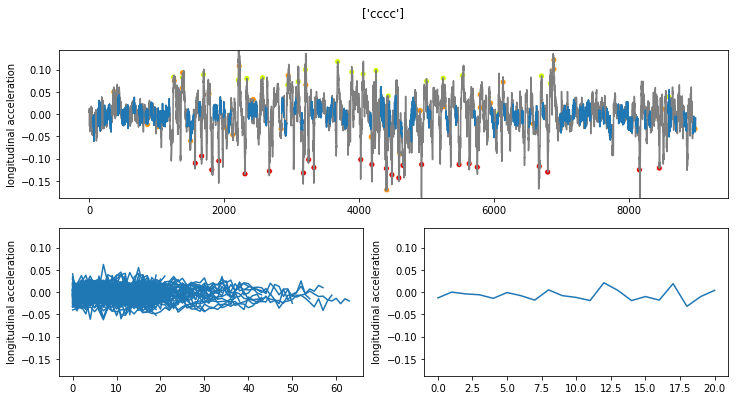

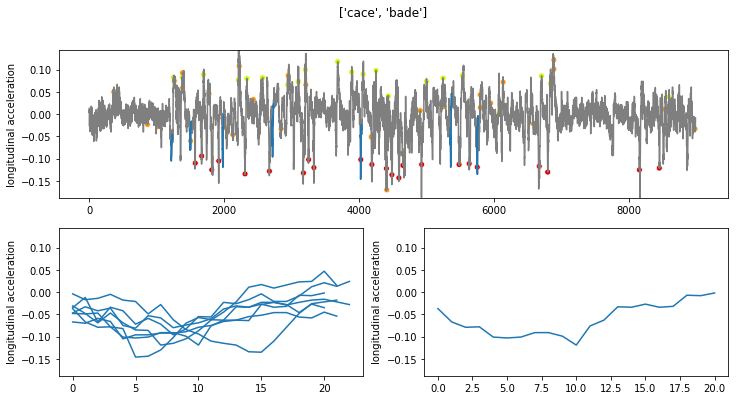

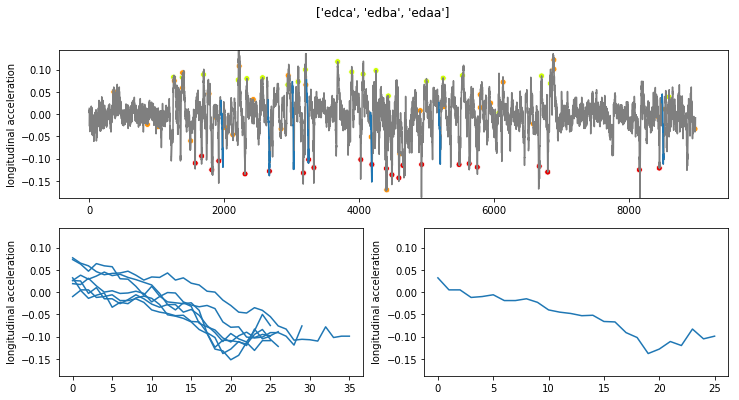

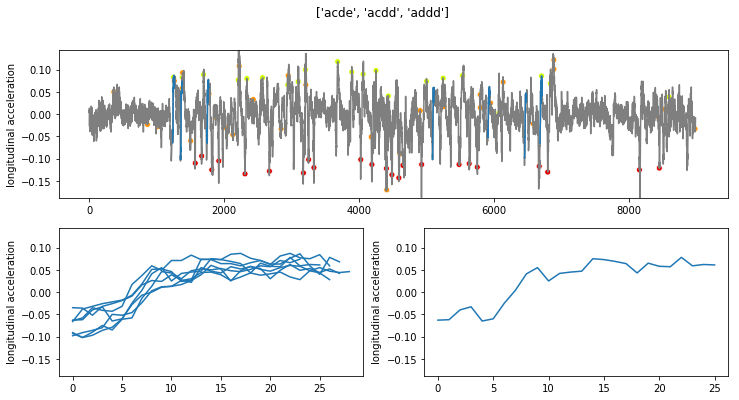

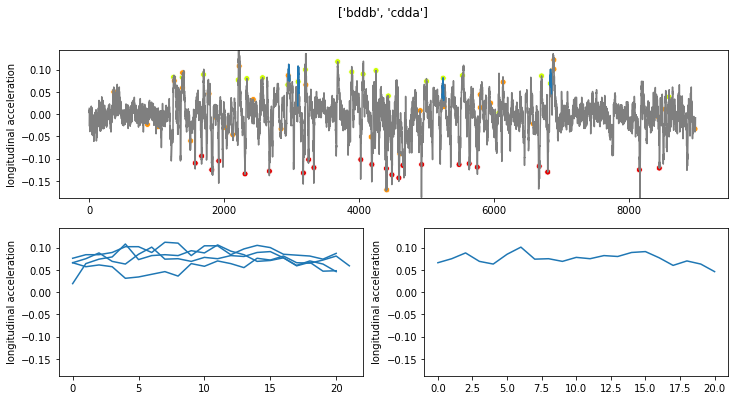

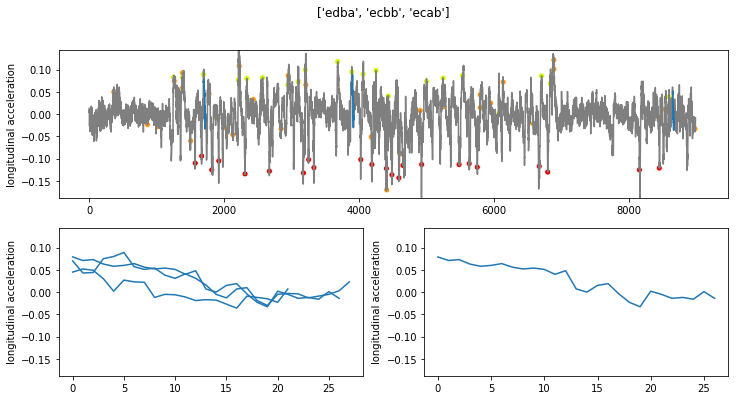

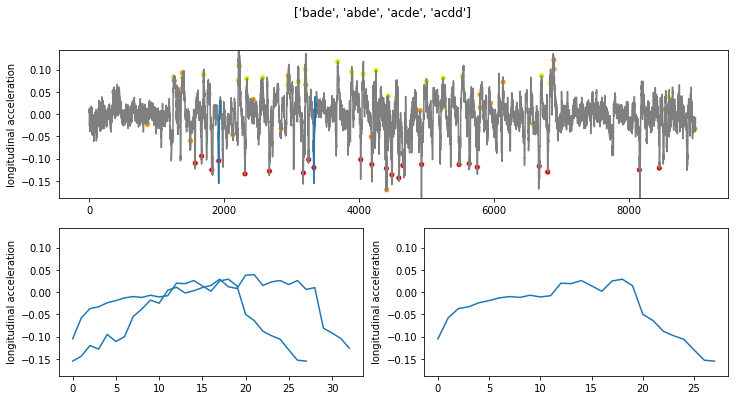

In [13]:
plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list, 'longitudinal acceleration')

In [14]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 27.1 minutes


## Experiment 3

In [15]:
R = 0.1
win_size = 20
paa_size = 2
alphabet_size = 5
adaptive_break_points = True

motif_file_name = 'motif_lon_acc_trip_exp' + str(exp) + '.p'
dist_file_name = 'dist_lon_acc_trip_exp' + str(exp) + '.npy'
exp += 1

In [16]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

motif_df = create_motif_table(motif_dic_list)
motif_df.sort_values('mdl_cost').head(10)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
Motif candidates of size 19 successfully extracted
Motif candidates of size 20 successfully

,pattern,pattern_len,n_members,mdl_cost,mean_dist
1,[cc],1,129,30310.20,0.07
4,[db],1,105,32235.95,0.07
6,"[cc, db]",2,84,33895.63,0.07
2,[bd],1,94,34101.62,0.07
5,"[db, cc]",2,83,34474.29,0.07
12,"[bd, cc]",2,82,34660.53,0.07
7,"[cc, bd]",2,80,35563.78,0.07
21,"[cc, db, cc]",3,55,38674.70,0.07
23,"[bd, cc, db]",3,55,39509.33,0.07
17,"[db, cc, bd]",3,50,41051.44,0.07


In [17]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.45 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[cc],1,129,30310.20,0.07
1,"[ea, db, cc, bd]",4,12,58434.71,0.07
2,"[ea, db, ea]",3,9,63970.76,0.06
3,"[db, ea, db, cc, bd, cc]",6,3,70909.53,0.05
4,"[cc, db, ea, db, cc, bd, ae]",7,3,71097.33,0.06
5,"[cc, db, ea, db, cc, bd, ae, bd]",8,2,75438.22,0.05
6,"[ae, bd, ae, bd, cc]",5,3,75859.26,0.05
7,"[ea, db, cc, bd, ae, bd, ae, bd, cc, db]",10,2,76336.03,0.05


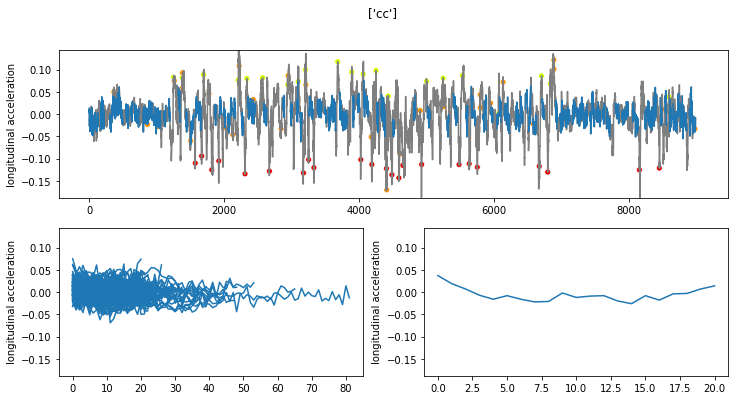

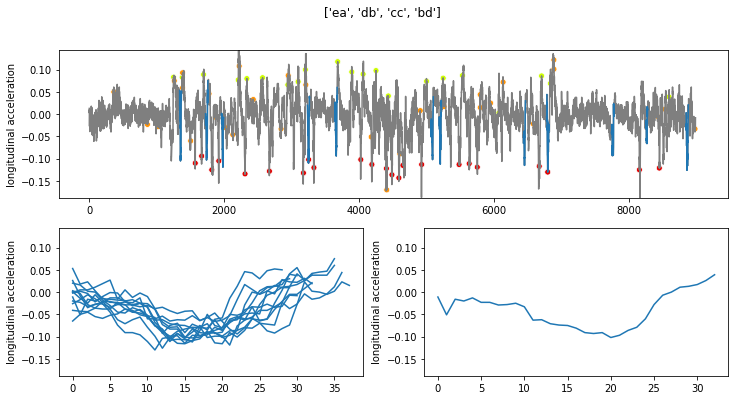

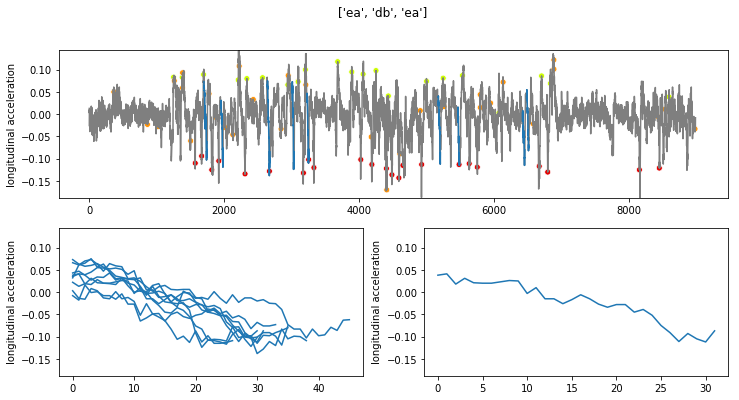

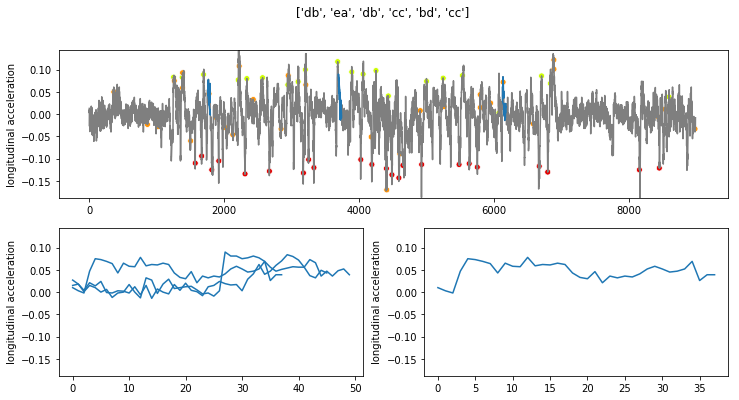

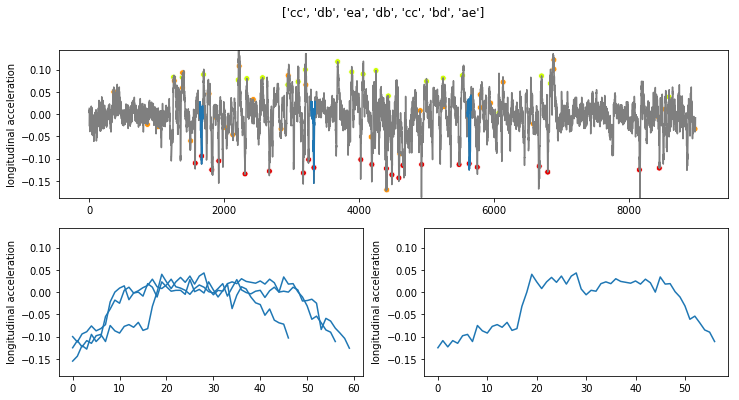

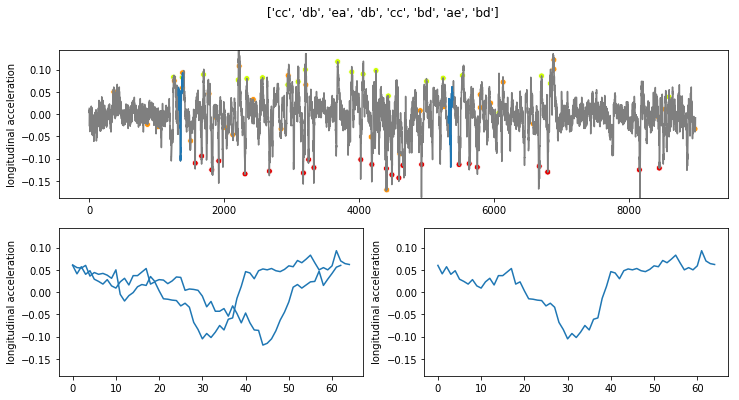

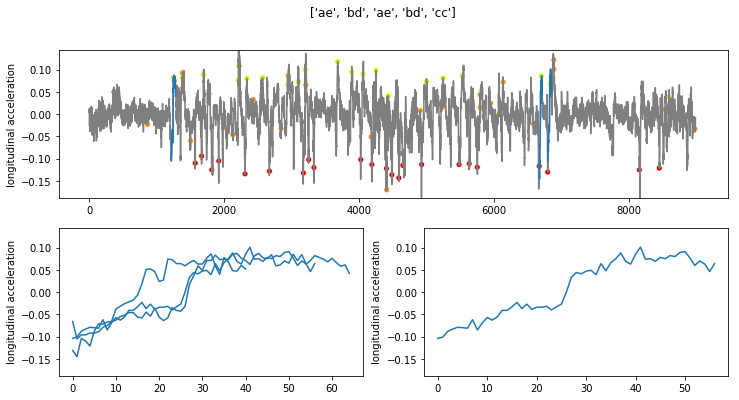

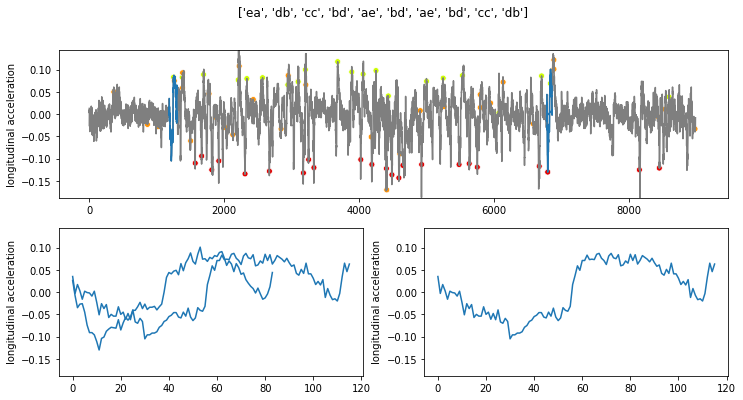

In [18]:
plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list, 'longitudinal acceleration')

In [19]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 35.6 minutes


## Experiment 4

In [20]:
R = 0.1
win_size = 15
paa_size = 3
alphabet_size = 7
adaptive_break_points = False

motif_file_name = 'motif_lon_acc_trip_exp' + str(exp) + '.p'
dist_file_name = 'dist_lon_acc_trip_exp' + str(exp) + '.npy'
exp += 1

In [21]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

motif_df = create_motif_table(motif_dic_list)
motif_df.sort_values('mdl_cost').head(10)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
ExtendedMD algorithm run in 10.28 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
91,[edd],1,79,50908.32,0.04
114,[ddc],1,74,52458.75,0.05
103,[dcc],1,65,53771.71,0.04
161,[eed],1,67,54290.74,0.03
111,[ddd],1,74,55670.47,0.05
50,[ccc],1,60,55781.69,0.04
110,[ffe],1,53,56305.54,0.05
43,[eee],1,61,56806.75,0.04
76,[edc],1,52,56962.38,0.05
143,[fed],1,47,57014.94,0.05


In [22]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.49 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[edd],1,79,50908.32,0.04
1,[baa],1,41,59886.51,0.07
2,[ggg],1,29,64102.48,0.07
3,[aae],1,14,74310.61,0.07
4,"[abf, acf]",2,3,87763.79,0.04
5,"[dcc, ccc, ccb, cca, cba, caa, baa, aaa, aab, ...",13,2,89059.41,0.04


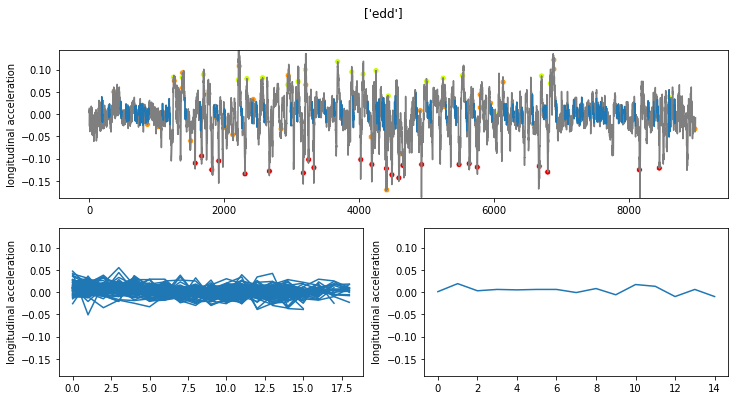

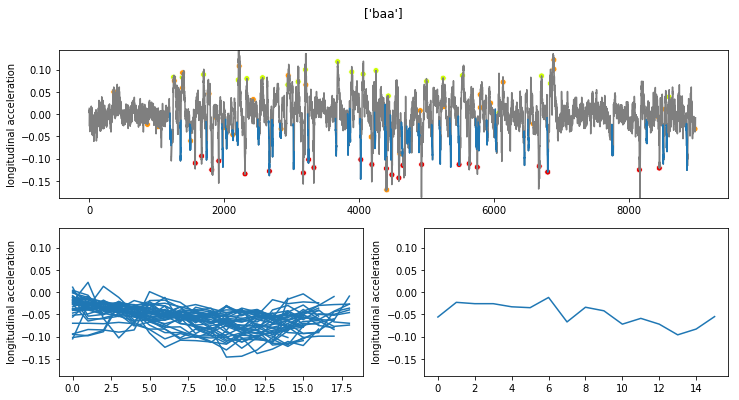

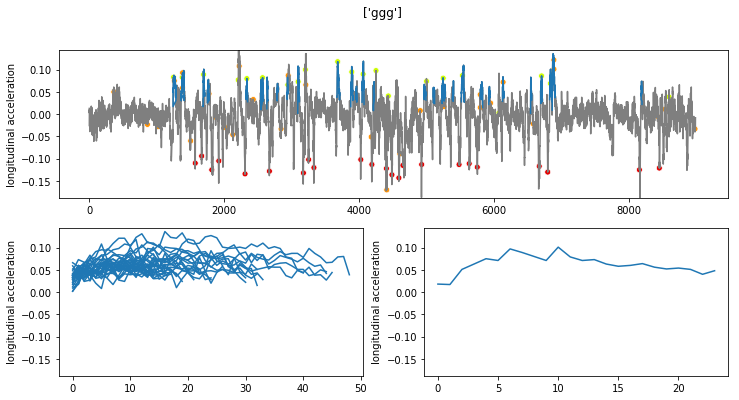

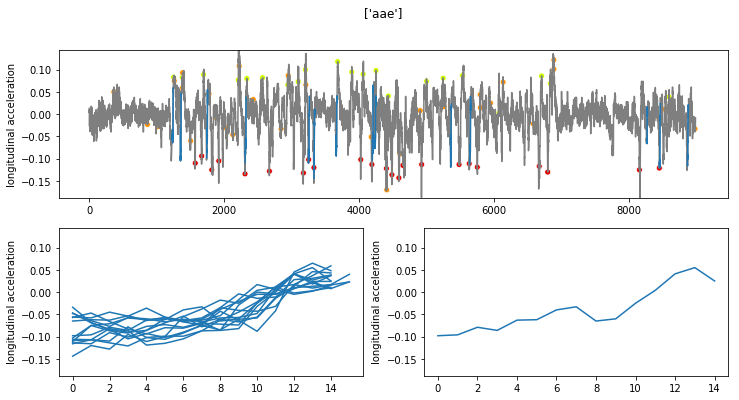

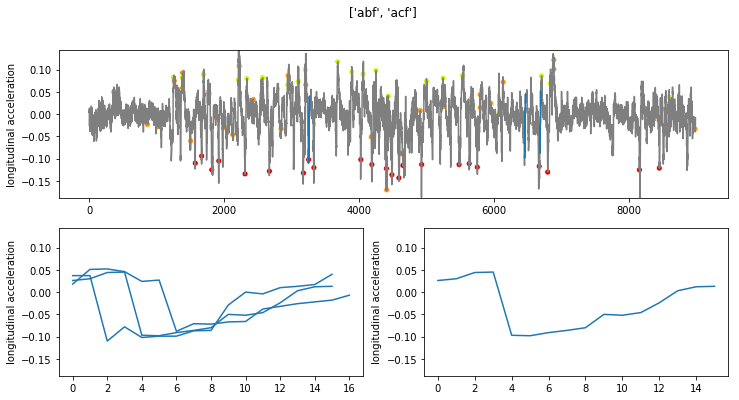

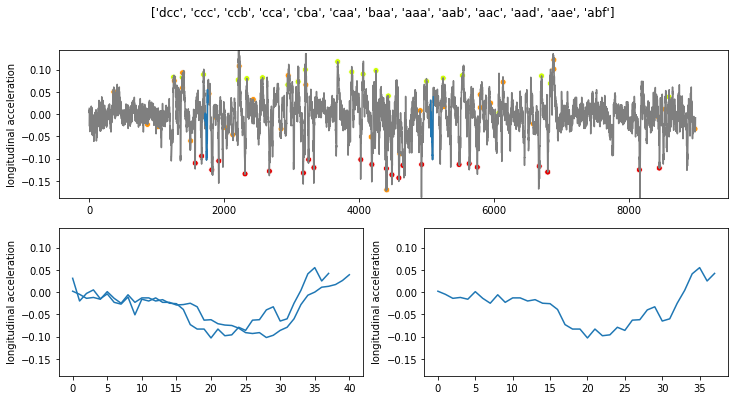

In [23]:
plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list, 'longitudinal acceleration')

In [24]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 113.0 minutes


## Experiment 5

In [25]:
R = 0.1
win_size = 20
paa_size = 4
alphabet_size = 7
adaptive_break_points = False

motif_file_name = 'motif_lon_acc_trip_exp' + str(exp) + '.p'
dist_file_name = 'dist_lon_acc_trip_exp' + str(exp) + '.npy'
exp += 1

In [26]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

motif_df = create_motif_table(motif_dic_list)
motif_df.sort_values('mdl_cost').head(10)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
ExtendedMD algorithm run in 9.33 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
277,[eeed],1,44,63007.73,0.05
22,[ddcc],1,42,63052.06,0.04
279,[eddd],1,46,63575.34,0.04
115,[dccc],1,39,64088.17,0.06
54,[eedd],1,38,64420.40,0.04
136,[eddc],1,29,65780.93,0.04
159,[dddc],1,45,65941.33,0.04
132,[eeee],1,37,65983.16,0.04
293,[fedd],1,27,66818.72,0.05
175,[deee],1,32,67387.58,0.04


In [27]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.4 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[eeed],1,44,63007.73,0.05
1,[baaa],1,20,70992.70,0.07
2,[gggg],1,23,71824.89,0.07
3,[aaae],1,10,77989.96,0.07
4,[aadf],1,3,89391.26,0.04
5,"[daaa, caaa, baaa, aaaa, aaab]",5,2,92396.59,0.04
6,"[gggf, ggff, ggfe, gffe, gfee, gfed, ffed]",7,2,95352.20,0.05


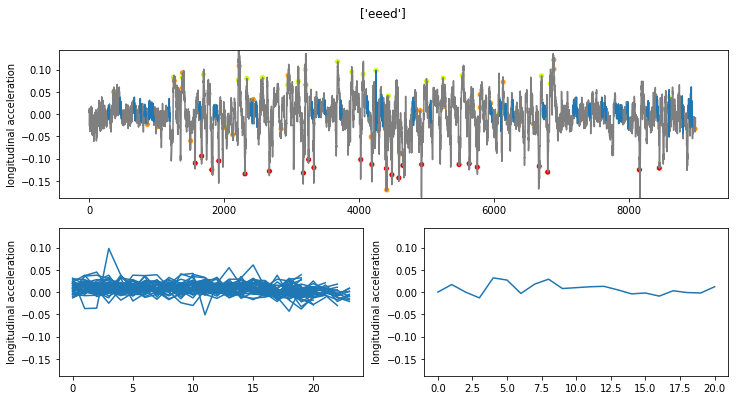

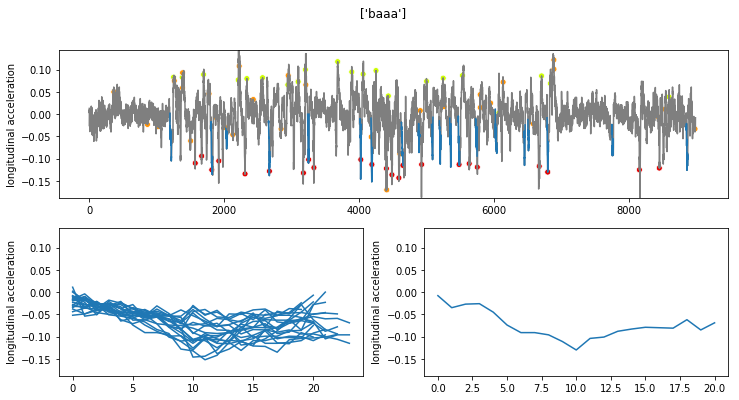

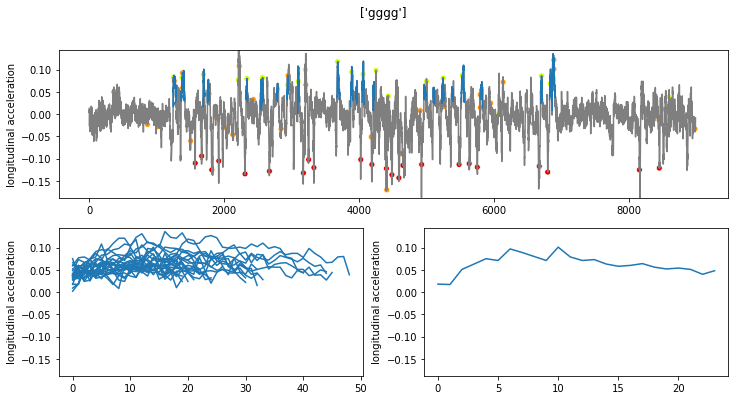

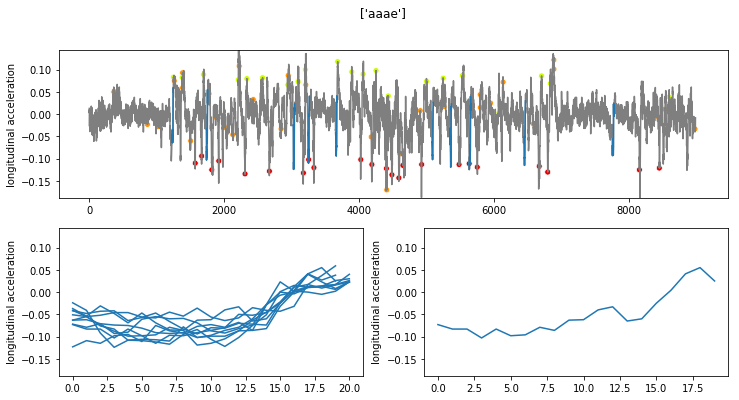

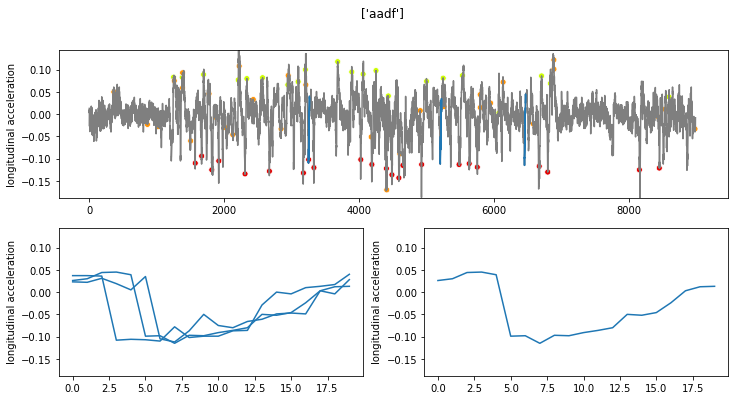

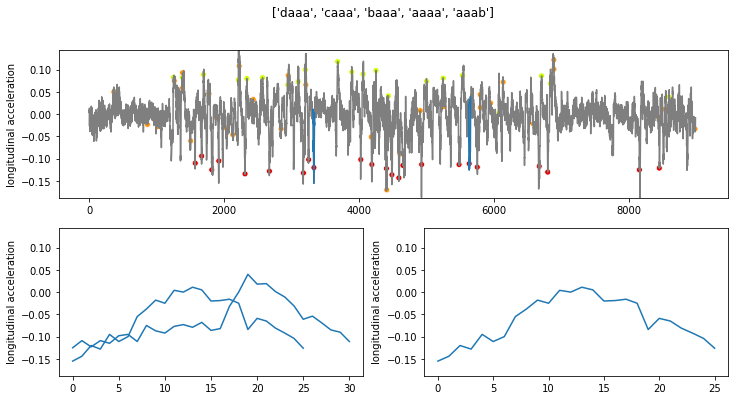

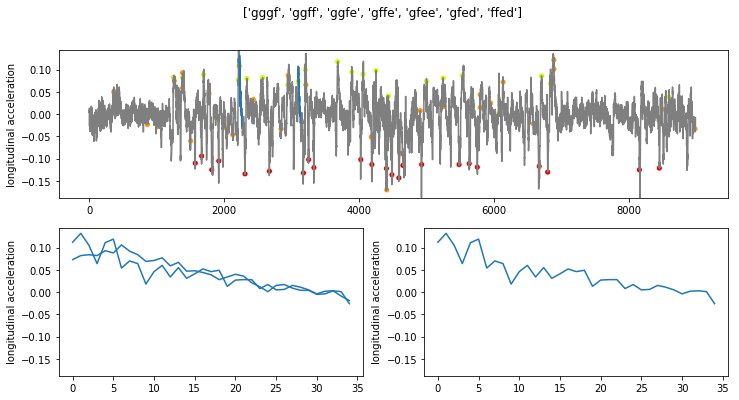

In [28]:
plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list, 'longitudinal acceleration')

In [29]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 104.5 minutes


## Experiment 6

In [30]:
R = 0.1
win_size = 20
paa_size = 2
alphabet_size = 7
adaptive_break_points = False

motif_file_name = 'motif_lon_acc_trip_exp' + str(exp) + '.p'
dist_file_name = 'dist_lon_acc_trip_exp' + str(exp) + '.npy'
exp += 1

In [31]:
start_time = time.time()
motif_dic_list, ts_1d = emd.find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
pickle.dump(motif_dic_list, open(os.path.join(output_folder, motif_file_name), "wb"))
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

motif_df = create_motif_table(motif_dic_list)
motif_df.sort_values('mdl_cost').head(10)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
Motif candidates of size 19 successfully extracted
Motif candidates of size 20 successfully

,pattern,pattern_len,n_members,mdl_cost,mean_dist
42,[ed],1,83,40606.59,0.06
13,[dc],1,78,41613.04,0.05
8,[ee],1,75,43099.23,0.06
44,[dd],1,78,44439.10,0.05
0,[fe],1,62,44529.74,0.06
14,[cc],1,55,46277.49,0.05
19,[cd],1,56,46673.50,0.05
37,[de],1,61,46980.49,0.05
34,[ef],1,45,48712.42,0.06
128,"[ee, ed]",2,44,48715.81,0.06


In [32]:
start_time = time.time()
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = create_motif_table(pruned_motif_dic_list)
print("Prunning algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))
pruned_motif_df

Prunning algorithm run in 0.94 minutes


,pattern,pattern_len,n_members,mdl_cost,mean_dist
0,[ed],1,83,40606.59,0.06
1,[fg],1,35,53761.14,0.07
2,[ba],1,30,55111.49,0.07
3,[ae],1,19,59796.37,0.07
4,"[ca, ba, aa, ab, ac, ad]",6,15,62914.99,0.07
5,"[bg, cg, dg, eg, fg, gg]",6,6,72609.14,0.07
6,"[ag, bg, cg, dg, eg, fg, gg, gf, ge, gd]",10,2,81350.89,0.05
7,"[fe, fd, fc, ec, eb, db, da]",7,2,81354.02,0.04


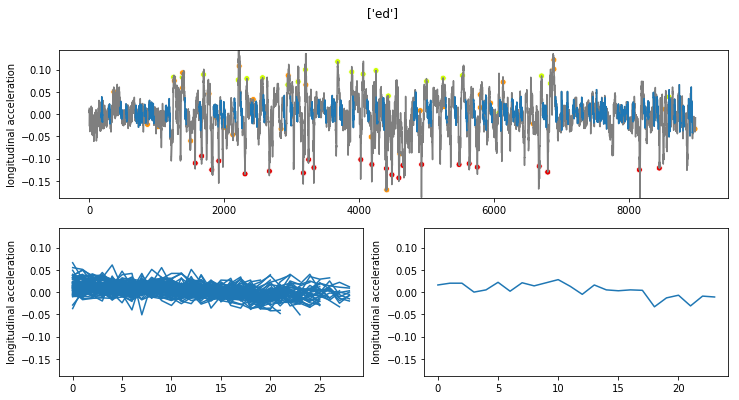

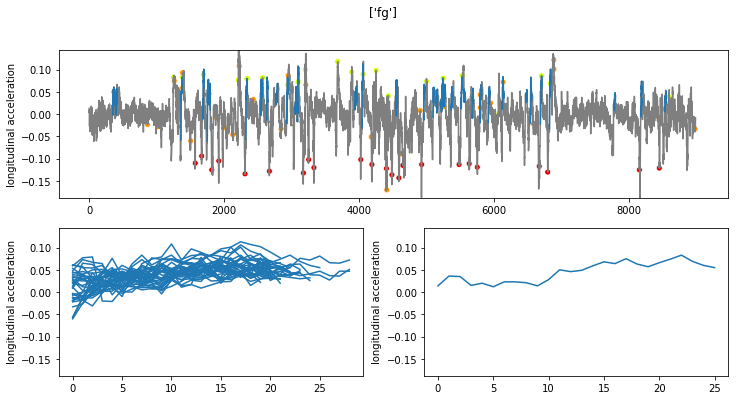

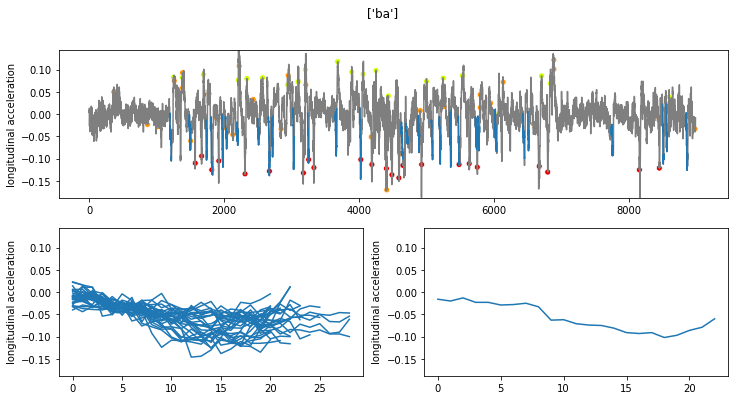

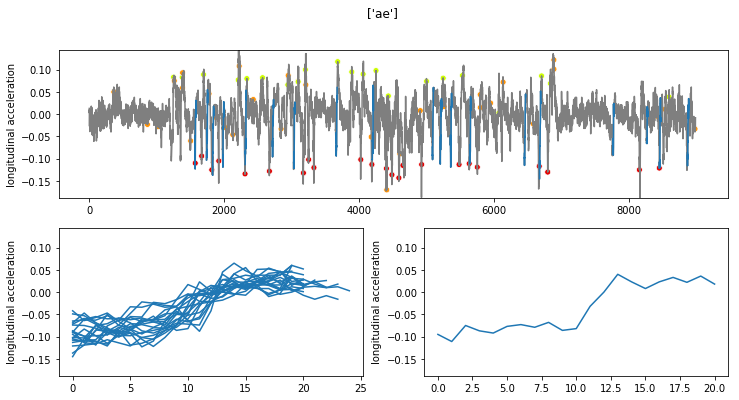

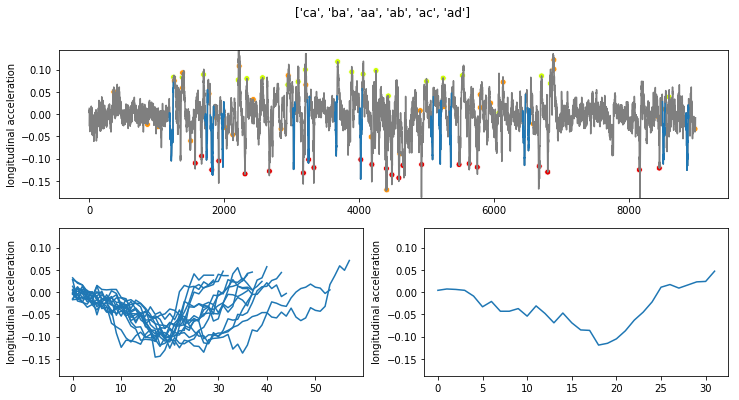

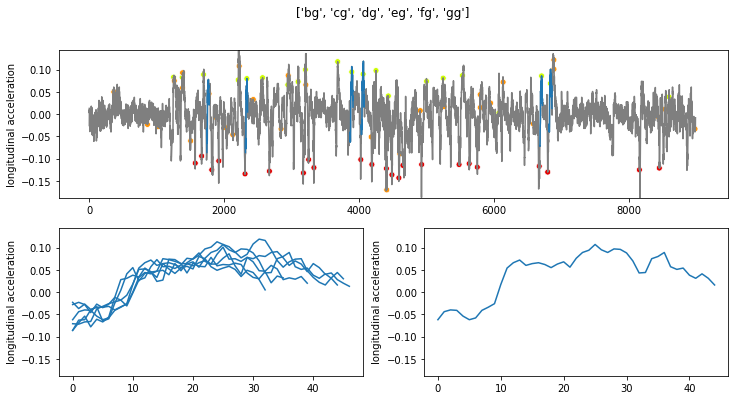

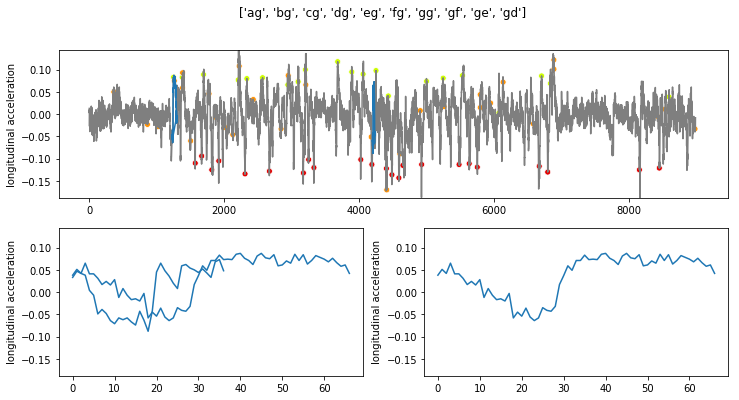

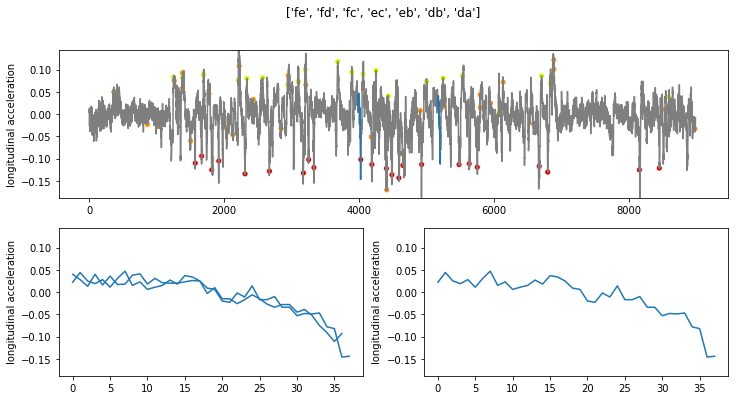

In [33]:
plot_k_motifs(len(pruned_motif_df), ts, events_ts, pruned_motif_dic_list, 'longitudinal acceleration')

In [34]:
center_ts_list = []
for motif_dic in motif_dic_list:
    motif_center_ts = [ts[i] for i in motif_dic['center_ts_pointers']]
    center_ts_list.append(motif_center_ts)
center_dist_mat = clust.compute_dtw_distance_matrix(center_ts_list, parallel=True)
np.save(os.path.join(output_folder, dist_file_name), center_dist_mat)

Distance matrix computed in 118.8 minutes
